In [34]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os

# convert RGB FITS array to grayscale
def grayscale(arr):
    if arr.ndim == 3:  # If the array is RGB (3D)
        rgb_index = np.array([0.299, 0.587, 0.114])
        arr = np.array(arr, dtype=np.float64)
        grayscale_array = np.einsum('i,ijk->jk', rgb_index, arr)
        return grayscale_array
    elif arr.ndim == 2:  # If the array is already grayscale (2D)
        return arr
    else:
        raise ValueError("ah hell nah. what is this array shape?")

fits_directories = [
    '/Users/kiavash/Desktop/astronomy_lab/hw2/iso100_time0.001',
    '/Users/kiavash/Desktop/astronomy_lab/hw2/iso100_time0.01',
    '/Users/kiavash/Desktop/astronomy_lab/hw2/iso100_time0.1',
    '/Users/kiavash/Desktop/astronomy_lab/hw2/iso100_time1',
    '/Users/kiavash/Desktop/astronomy_lab/hw2/iso100_time10'
]

exposure_times = [0.001, 0.01, 0.1, 1, 10]

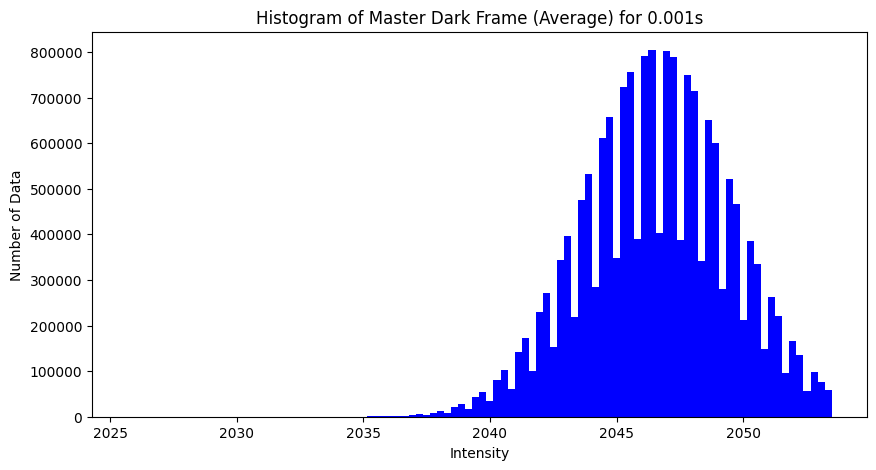

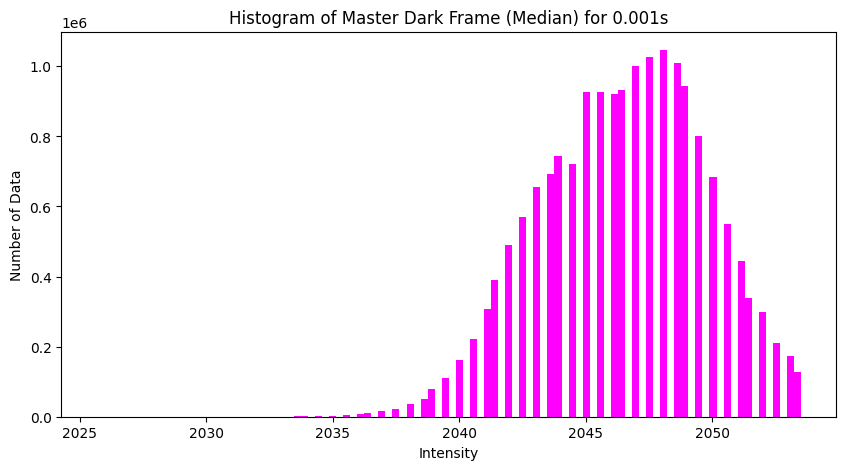

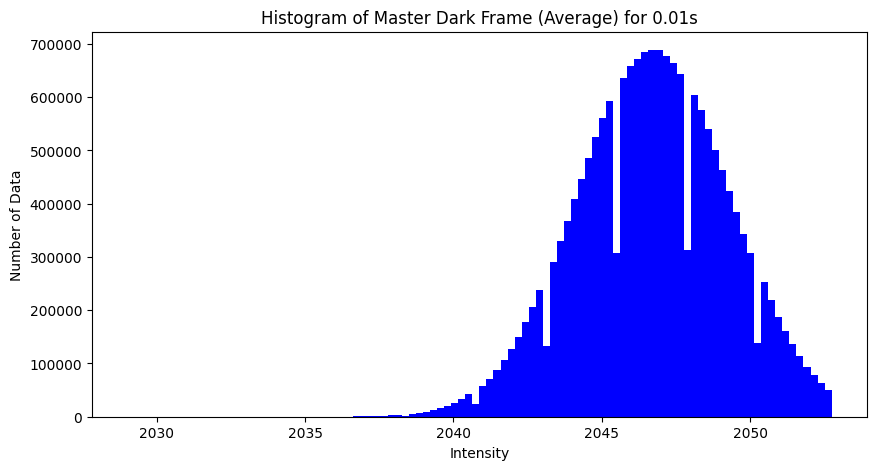

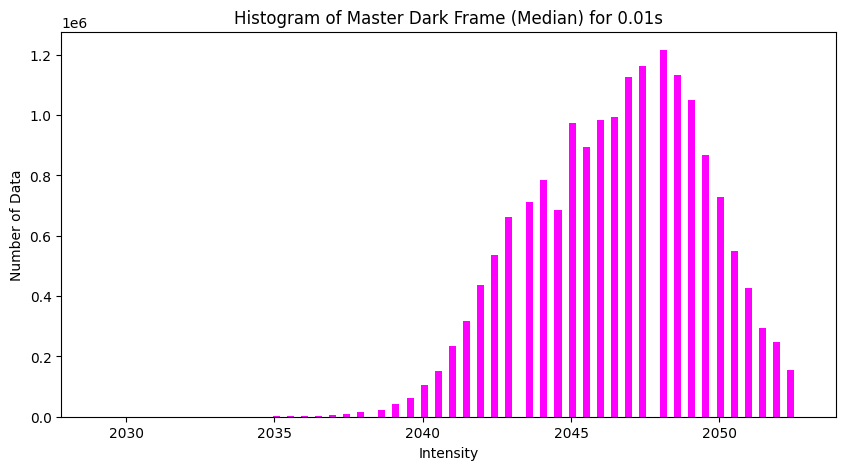

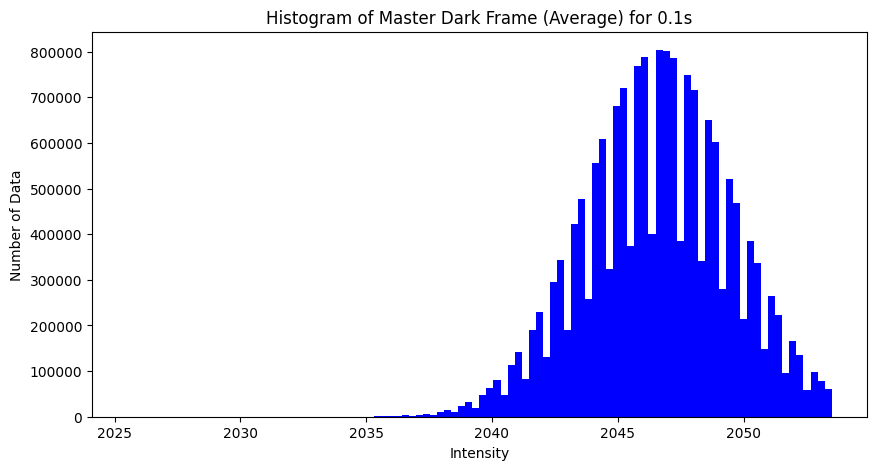

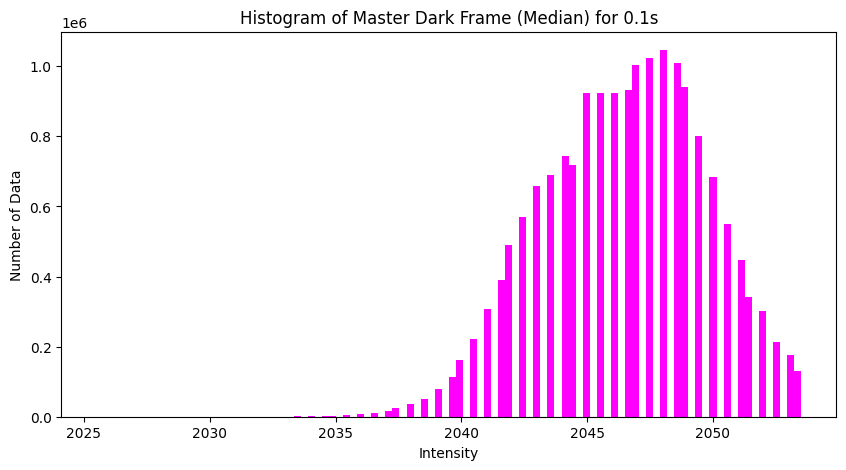

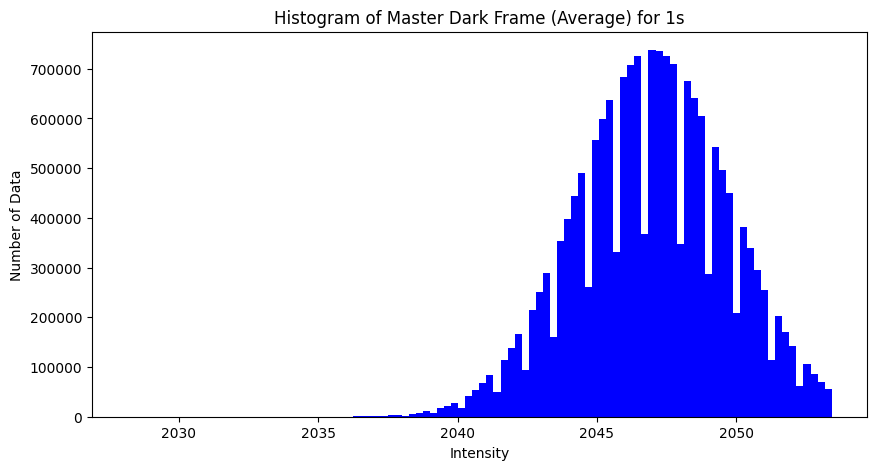

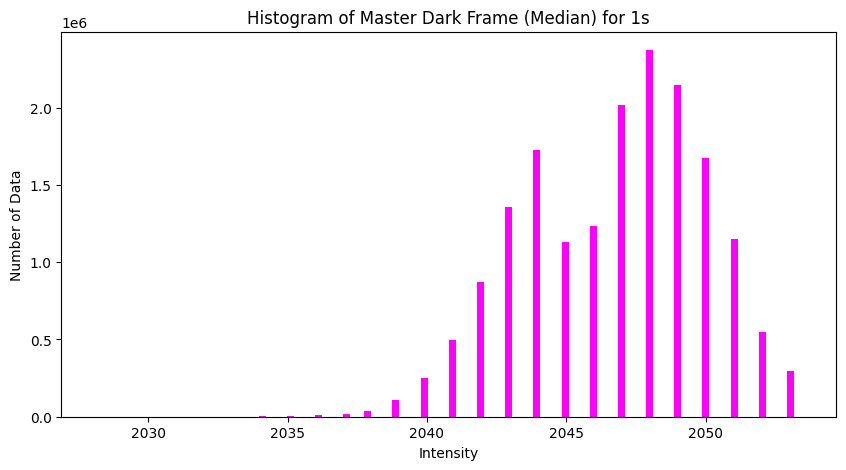

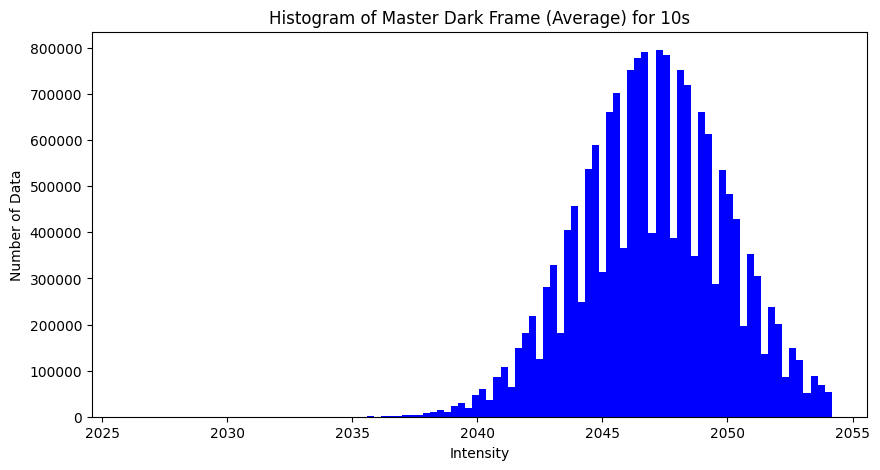

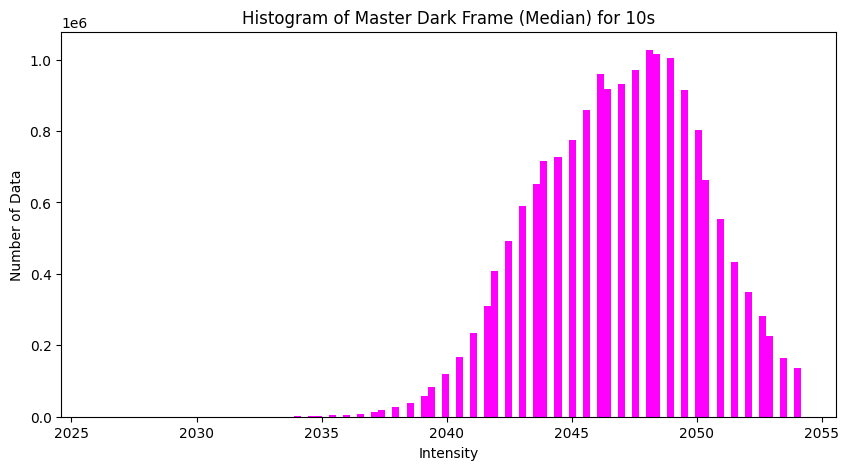

In [35]:
mean_values = []
median_values = []
std_values_mean = []
std_values_median = []
variance_values_mean = []
variance_values_median =[]
mean_errors = []
median_errors = []

for fits_directory, exposure in zip(fits_directories, exposure_times):
    fits_files = [f for f in os.listdir(fits_directory) if f.endswith('.fit')]
    grayscale_arrays = []

    for file in fits_files:
        fits_path = os.path.join(fits_directory, file)
        array = fits.open(fits_path)[0].data
        array_gray = grayscale(array)
        grayscale_arrays.append(array_gray)

    grayscale_stack = np.stack(grayscale_arrays, axis=0)
    master_dark_average = np.mean(grayscale_stack, axis=0)
    master_dark_median = np.median(grayscale_stack, axis=0)

    master_dark_average_flat = master_dark_average.flatten()
    master_dark_median_flat = master_dark_median.flatten()

    # standard error (std / sqrt(N))
    N_pixels = master_dark_average_flat.size  # Total number of pixels
    mean_error = np.std(master_dark_average_flat) / np.sqrt(N_pixels)
    median_error = np.std(master_dark_median_flat) / np.sqrt(N_pixels)

    bins = 100
    # zoom in histograms
    range_min, range_max = np.percentile(master_dark_average_flat, [0, 99])

    plt.figure(figsize=(10, 5))
    plt.title(f'Histogram of Master Dark Frame (Average) for {exposure}s')
    plt.xlabel('Intensity')
    plt.ylabel('Number of Data')
    plt.hist(master_dark_average_flat, bins=bins, range=(range_min, range_max), color='blue')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.title(f'Histogram of Master Dark Frame (Median) for {exposure}s')
    plt.xlabel('Intensity')
    plt.ylabel('Number of Data')
    plt.hist(master_dark_median_flat, bins=bins, range=(range_min, range_max), color='magenta')
    plt.show()

    mean_values.append(np.mean(master_dark_average_flat))
    median_values.append(np.mean(master_dark_median_flat))
    std_values_mean.append(np.std(master_dark_average_flat))
    std_values_median.append(np.std(master_dark_median_flat))
    variance_values_mean.append(np.var(master_dark_average_flat))
    variance_values_median.append(np.var(master_dark_median_flat))
    mean_errors.append(mean_error)
    median_errors.append(median_error)

In [38]:
print("Exposure Time (s) | Mean Intensity ± Error | Median Intensity ± Error")
print("--------------------------------------------------------------------")
for exp, mean, mean_err, median, median_err in zip(exposure_times, mean_values, mean_errors, median_values, median_errors):
    print(f"{exp}s | {mean:.4f} ± {mean_err:.4f} | {median:.4f} ± {median_err:.4f}")

Exposure Time (s) | Mean Intensity ± Error | Median Intensity ± Error
--------------------------------------------------------------------
0.001s | 2046.6356 ± 0.0007 | 2046.6265 ± 0.0008
0.01s | 2046.7367 ± 0.0006 | 2046.7326 ± 0.0007
0.1s | 2046.6386 ± 0.0007 | 2046.6314 ± 0.0008
1s | 2047.0219 ± 0.0008 | 2047.0212 ± 0.0009
10s | 2047.1070 ± 0.0021 | 2047.1045 ± 0.0022


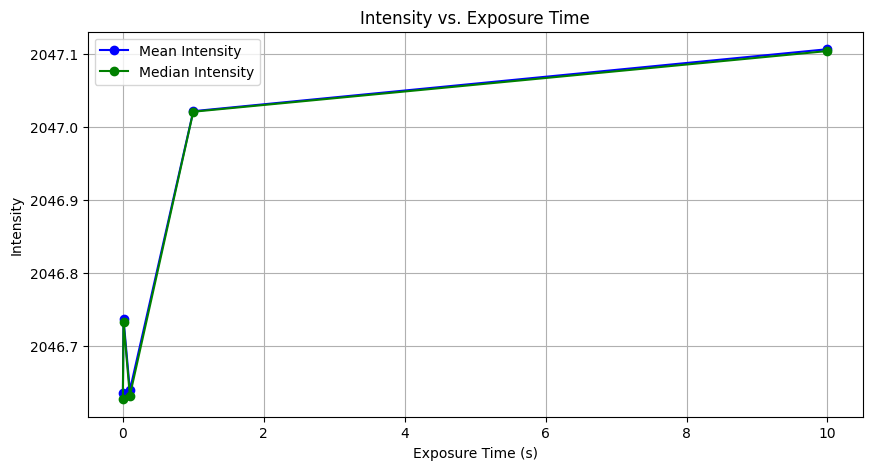

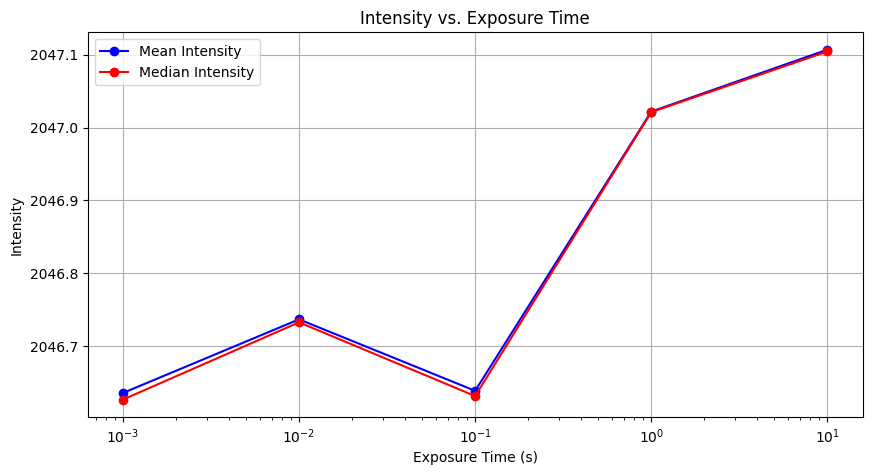

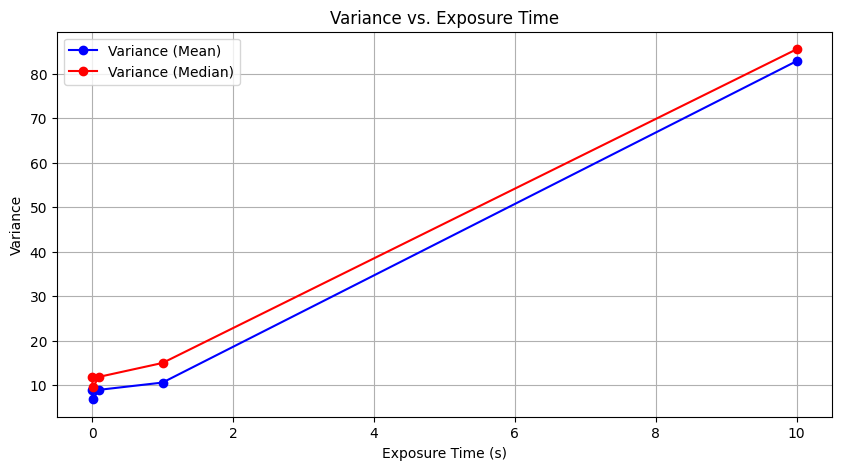

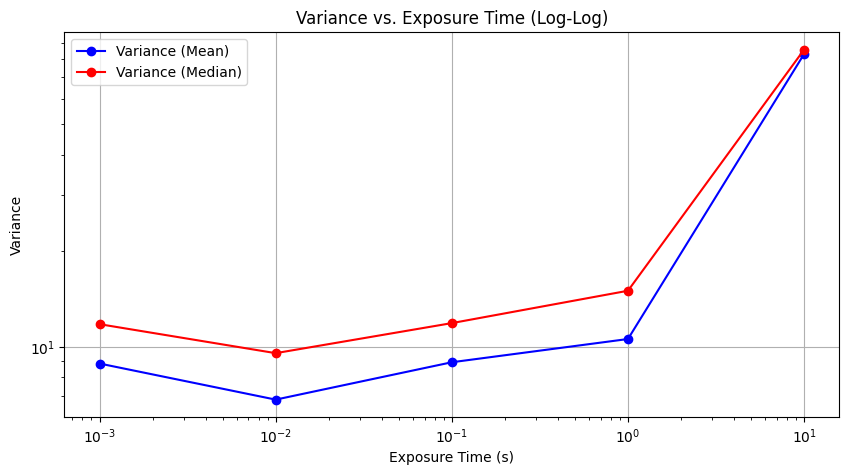

Exposure Time 0.001s - Standard Deviation (Mean): 2.974225548464678
Exposure Time 0.001s - Standard Deviation (Median): 3.42887169597451

Exposure Time 0.01s - Standard Deviation (Mean): 2.610566026916189
Exposure Time 0.01s - Standard Deviation (Median): 3.0879097144401393

Exposure Time 0.1s - Standard Deviation (Mean): 2.9881322487219393
Exposure Time 0.1s - Standard Deviation (Median): 3.4421510214640128

Exposure Time 1s - Standard Deviation (Mean): 3.249908019029595
Exposure Time 1s - Standard Deviation (Median): 3.869275773557979

Exposure Time 10s - Standard Deviation (Mean): 9.10372915025212
Exposure Time 10s - Standard Deviation (Median): 9.24909824642407



In [37]:
# Mean Intensity vs. Exposure Time
plt.figure(figsize=(10, 5))
plt.plot(exposure_times, mean_values, 'bo-', label='Mean Intensity')
plt.plot(exposure_times, median_values, 'go-', label='Median Intensity')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Intensity')
plt.title('Intensity vs. Exposure Time')
plt.legend()
plt.grid(True)
plt.show()

# Mean Intensity vs. Exposure Time (log)
plt.figure(figsize=(10, 5))
plt.plot(exposure_times, mean_values, 'bo-', label='Mean Intensity')
plt.plot(exposure_times, median_values, 'ro-', label='Median Intensity')
plt.xscale('log')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Intensity')
plt.title('Intensity vs. Exposure Time')
plt.legend()
plt.grid(True)
plt.show()

# Variance vs. Exposure Time
plt.figure(figsize=(10, 5))
plt.plot(exposure_times, variance_values_mean, 'bo-', label='Variance (Mean)')
plt.plot(exposure_times, variance_values_median, 'ro-', label='Variance (Median)')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Variance')
plt.title('Variance vs. Exposure Time')
plt.legend()
plt.grid(True)
plt.show()

# Variance vs. Exposure Time (Log-Log)
plt.figure(figsize=(10, 5))
plt.plot(exposure_times, variance_values_mean, 'bo-', label='Variance (Mean)')
plt.plot(exposure_times, variance_values_median, 'ro-', label='Variance (Median)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Variance')
plt.title('Variance vs. Exposure Time (Log-Log)')
plt.legend()
plt.grid(True)
plt.show()

# standard deviations
for exp, std_mean, std_median in zip(exposure_times, std_values_mean, std_values_median):
    print(f"Exposure Time {exp}s - Standard Deviation (Mean): {std_mean}")
    print(f"Exposure Time {exp}s - Standard Deviation (Median): {std_median}\n")